In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn import metrics

In [53]:
bikes = pd.read_csv(r'C:\Users\Ravi Teja\Desktop\Datasets\Bike-Sharing-Dataset\train.csv',index_col='datetime', parse_dates=True)

In [54]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Data cleaning: 

Looking for any n/a values and removing them using dropna()

In [55]:
#Looking for any N/a values 

bikes.isnull().values.any()

False

In [56]:
#Renaming count as 'total'

bikes.rename(columns={'count':'total'}, inplace=True)

#### Data Visualizaton using Pandas and Seaborn:

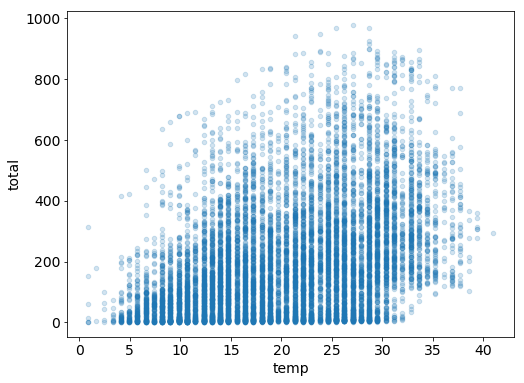

In [57]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.show()

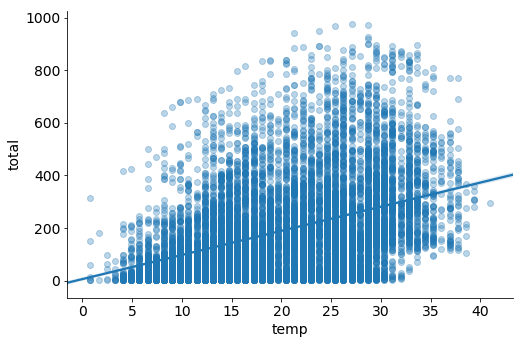

In [58]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.3})
plt.show()

#### Feature selection:

In this I am using only temp as independent variable for regression and total as the dependent variable.

In [59]:
#creating our dependent and independent variables

feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

In [60]:
linreg = LinearRegression()
linreg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
print(linreg.intercept_)
print(linreg.coef_)

6.04621295962
[ 9.17054048]


#### Intrepreting the values: 

So the intercept for this linear regression with just 'temp' as feature is 6.04621295962 and coeffiecient is 9.17054048

So the intrepretation for these is values is that

##### total = 6.04621295962 + 9.17054048('temp')

To make a prediction for a certain temp value, i am using predict function

In [62]:
#Predicting using 'predict' function:

linreg.predict(35)

array([ 327.01512981])

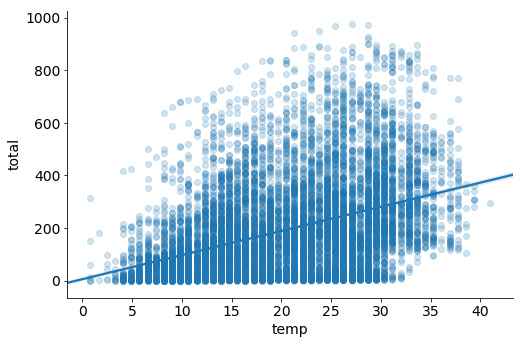

In [63]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})
plt.show()

### Adding more features:

In this step, I am trying to add more features into the regression function and predict the values.

In [64]:
# explore more features
feature_cols2 = ['temp', 'season', 'weather', 'humidity']

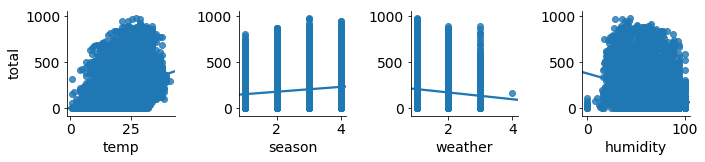

In [65]:
# multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols2, y_vars='total', kind='reg')
plt.show()

In [66]:
# cross-tabulation of season and month
pd.crosstab(bikes.season, bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


C:\Users\Ravi Teja\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


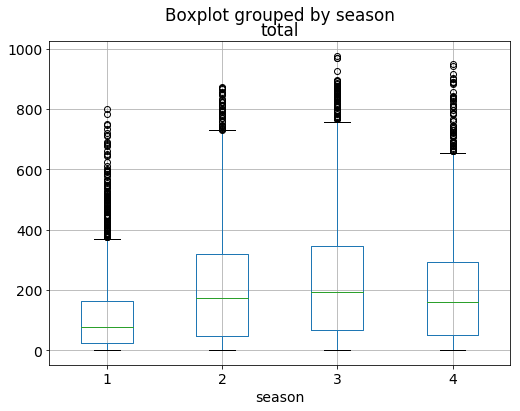

In [67]:
# box plot of rentals, grouped by season
bikes.boxplot(column='total', by='season')
plt.show()

### Understanding the graph

In this plot we can understand that the most bike are rented in season 3 than any other and season 1 has lowest rentals

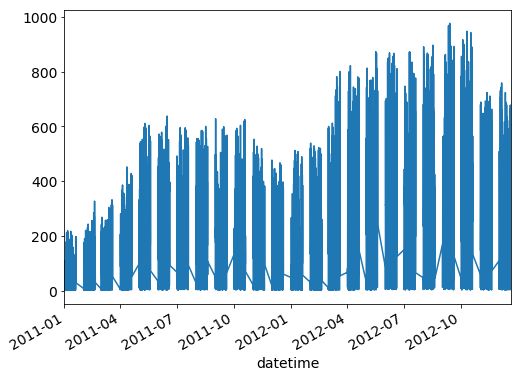

In [68]:
# line plot of rentals
bikes.total.plot()
plt.show()

This shows us that there are more rentals in winter than in spring.

In [69]:
#correlation matrix between the features: 

bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


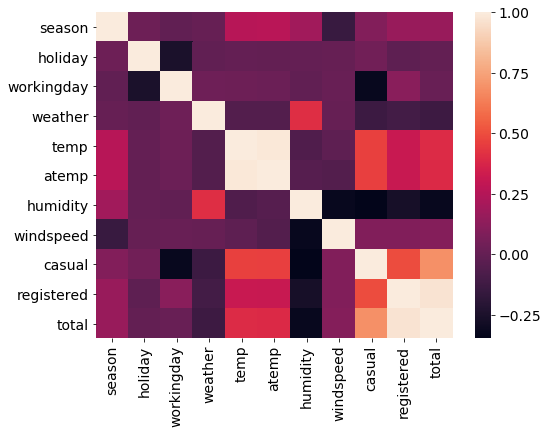

In [70]:
#Heat map for above matrix:

sns.heatmap(bikes.corr())
plt.show()

### Changing the model by adding more features:

I am trying to add season, weather, humidity and season to the regression model and check the results on test data.

In [71]:
#Defining dependant and independent variables:
X = bikes[feature_cols2]
y = bikes.total

In [72]:
# fit the regression model:

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
#Looking at the coffeicients:

print(linreg.intercept_)
print(linreg.coef_)

159.520687861
[  7.86482499  22.53875753   6.67030204  -3.11887338]


This means if all the values are constant then increase in 1 unit of temp gives increase of 7.86 bikes

and 1 unit increase in season gives increase of 22.5 bikes
and 1 unit increase in weather gives increase of 6.67 bikes 
 and 1 unit increase in humidity gives decrease of 3.11 bikes

### Testing the model on train/test split:

In [74]:
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [75]:
print(train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print(train_test_rmse(['temp', 'season', 'weather']))
print(train_test_rmse(['temp', 'season', 'humidity']))

155.649459131
164.165399763
155.598189367


In [76]:
print(train_test_rmse(['temp']))

166.175955908


### Categorical variables:

In this data, we clearly know that season is categorical data. To handle the categorical data, I am using dummies to reduce the RMSE among the variables. 

In [105]:
#creating dummies:

season_dummies = pd.get_dummies(bikes.season, prefix='season')

In [106]:
season_dummies.head()

,season_1,season_2,season_3,season_4
datetime,,,,
2011-01-01 00:00:00,1,0,0,0
2011-01-01 01:00:00,1,0,0,0
2011-01-01 02:00:00,1,0,0,0
2011-01-01 03:00:00,1,0,0,0
2011-01-01 04:00:00,1,0,0,0


We can remove one of the dummies as we can capture all the data with 3 dummies. 

,season_2,season_3,season_4
datetime,,,
2011-01-01 00:00:00,0,0,0
2011-01-01 01:00:00,0,0,0
2011-01-01 02:00:00,0,0,0
2011-01-01 03:00:00,0,0,0
2011-01-01 04:00:00,0,0,0


In [108]:
#rename season dummies for better understanding:
season_dummies = season_dummies.rename(index=str, columns={ "season_1":"spring","season_2": "summer", "season_3": "fall", "season_4": "winter"})
season_dummies.sample(n=5)

,spring,summer,fall,winter
datetime,,,,
2011-07-04 20:00:00,0,0,1,0
2012-11-19 21:00:00,0,0,0,1
2012-06-12 06:00:00,0,1,0,0
2011-07-03 17:00:00,0,0,1,0
2012-07-16 12:00:00,0,0,1,0


In [109]:
#drop first column:
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)
season_dummies.head()

,summer,fall,winter
datetime,,,
2011-01-01 00:00:00,0,0,0
2011-01-01 01:00:00,0,0,0
2011-01-01 02:00:00,0,0,0
2011-01-01 03:00:00,0,0,0
2011-01-01 04:00:00,0,0,0


In [110]:
#Concate this with bikes dataset:

bikes = pd.concat([bikes, season_dummies], axis=1)

In [113]:
bikes.sample(n=5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,summer,fall,winter
datetime,,,,,,,,,,,,,,
2012-07-03 15:00:00,3,0,1,2,36.90,38.635,24,0.0000,71,330,401,0,1,0
2011-01-02 09:00:00,1,0,0,2,15.58,19.695,76,15.0013,1,19,20,0,0,0
2012-08-02 13:00:00,3,0,1,1,35.26,39.395,44,15.0013,98,212,310,0,1,0
2012-03-04 07:00:00,1,0,0,2,12.30,13.635,52,19.9995,2,21,23,0,0,0
2011-03-13 05:00:00,1,0,0,1,14.76,17.425,62,8.9981,0,3,3,0,0,0


In [152]:
# include dummy variables for season in the model
feature_cols = ['temp', 'summer', 'fall', 'winter', 'humidity']
X = bikes[feature_cols]
y = bikes.total


In [155]:
def train_test_rmse(feature_cols):
    feature_cols = ['temp', 'summer', 'fall', 'winter', 'humidity']
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [156]:
print(train_test_rmse(['temp', 'summer','fall', 'winter', 'humidity']))

158.002770395
